# NLP - Elon Musk's Tweets

Elon Musk Tweets (2010 - 2021) - [Kaggle](https://www.kaggle.com/ayhmrba/elon-musk-tweets-2010-2021)

* [Tokenize & Stopwords using NLTK](#token)
  - WordCloud
* Analyse Sentiments using NLTK
  - [Most-liked Tweets - Negative Sentiments](#negsentiments)
  - [Most-liked Tweets - Positive Sentiments](#possentiments)
* [Tweets on Crypto](#crypto)
  - Doge
  - Bitcoin


In [280]:
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", 200)
pd.set_option("display.max_colwidth", 200)

In [281]:
df = pd.read_csv("https://raw.githubusercontent.com/abbylmm/DS_Uncut/main/elonmusktweets.csv")

df_ElonMuskTweets = pd.DataFrame(df, columns=['date', 'tweet', 'username', 'nlikes', 'nreplies', 'nretweets'])
df_ElonMuskTweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12339 entries, 0 to 12338
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       12339 non-null  object
 1   tweet      12339 non-null  object
 2   username   12339 non-null  object
 3   nlikes     12339 non-null  int64 
 4   nreplies   12339 non-null  int64 
 5   nretweets  12339 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 578.5+ KB


In [282]:
df_ElonMuskTweets.head()

,date,tweet,username,nlikes,nreplies,nretweets
0,2021-03-22 02:10:37,@bluemoondance74 @NASASpaceflight Going well. Lot of work for an extra 20 secs of Isp!,elonmusk,2678,234,134
1,2021-03-21 20:39:07,@NASASpaceflight Hopefully will happen this decade,elonmusk,7967,535,570
2,2021-03-21 08:42:00,@newscientist True,elonmusk,15510,539,409
3,2021-03-21 05:31:31,@cleantechnica I am accumulating resources to help make life multiplanetary &amp; extend the light of consciousness to the stars,elonmusk,143476,10500,12483
4,2021-03-21 04:32:11,"@CathieDWood When vast amounts of manufacturing are needed, as in robotaxis, this slows down rate of introduction, so maybe more like winner-takes-a-quarter. Still great.",elonmusk,6568,376,425


<a id="token"></a>
# Tokenize & Stopwords using NLTK

In [283]:
# remove url

import re
def remove_URL(headline_text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', headline_text)

In [284]:
df_ElonMuskTweets['tweet'] = df_ElonMuskTweets['tweet'].apply(remove_URL)

In [285]:
# remove numbers

def remove_numbers(text):
	number_pattern = r'\d+'
	without_number = re.sub(pattern=number_pattern, repl=" ", string=text)
	return without_number

In [286]:
# remove emojis

def remove_emoji(text):	
	emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
	without_emoji = emoji_pattern.sub(r'',text)
	return without_emoji

In [287]:
only_tweets = df_ElonMuskTweets['tweet'].to_string()
only_tweets = remove_numbers(only_tweets)
only_tweets = remove_emoji(only_tweets)

In [288]:
# remove punctuations

punctuations = '''\r\n!()-[]{};:'"\, <>./?@#$%^&*_~'''

for character in only_tweets:
  if character in punctuations:
    only_tweets = only_tweets.replace(character, ' ')

only_tweets = only_tweets.lower()

In [289]:
tokens = only_tweets.split()
len(tokens)

158043

In [290]:
import nltk
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

In [291]:
tokens_filtered = []

for t in tokens:
    if t not in stopwords:
        tokens_filtered.append(t)

In [292]:
from collections import Counter
print(Counter(tokens_filtered).most_common(50))

[('tesla', 1785), ('amp', 1746), ('spacex', 695), ('erdayastronaut', 606), ('yes', 578), ('good', 464), ('model', 463), ('flcnhvy', 442), ('like', 386), ('great', 376), ('would', 366), ('it’s', 362), ('car', 309), ('much', 299), ('one', 295), ('…', 280), ('time', 279), ('next', 272), ('ppathole', 268), ('high', 265), ('yeah', 251), ('also', 249), ('true', 246), ('rocket', 244), ('people', 243), ('soon', 239), ('year', 238), ('sure', 233), ('make', 229), ('teslaownerssv', 229), ('cars', 221), ('new', 219), ('probably', 217), ('first', 214), ('thanks', 212), ('need', 211), ('teslarati', 210), ('space', 210), ('right', 208), ('exactly', 208), ('launch', 204), ('get', 203), ('work', 202), ('production', 200), ('even', 200), ('coming', 198), ('many', 195), ('better', 190), ('team', 186), ('falcon', 185)]


### WordCloud

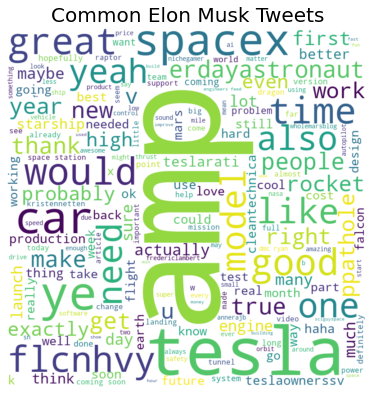

In [293]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

text = ' '.join(tokens_filtered)

wordcloud = WordCloud(width = 800, height = 800,
                      background_color = 'white',
                      min_font_size = 10, 
                      stopwords = stopwords
                     ).generate(text)

# plot the WordCloud image
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad = 0)
plt.title(label = 'Common Elon Musk Tweets', fontsize = 20)
plt.show()

<a id="sentiments"></a>
# Analyse Sentiments using NLTK

In [294]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\munmun\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [295]:
sentiments = [analyzer.polarity_scores(tweet)['compound'] for tweet in df_ElonMuskTweets['tweet']]

df_ElonMuskTweets['Sentiments'] = sentiments
df_ElonMuskTweets.head()

,date,tweet,username,nlikes,nreplies,nretweets,Sentiments
0,2021-03-22 02:10:37,@bluemoondance74 @NASASpaceflight Going well. Lot of work for an extra 20 secs of Isp!,elonmusk,2678,234,134,0.3382
1,2021-03-21 20:39:07,@NASASpaceflight Hopefully will happen this decade,elonmusk,7967,535,570,0.4019
2,2021-03-21 08:42:00,@newscientist True,elonmusk,15510,539,409,0.4215
3,2021-03-21 05:31:31,@cleantechnica I am accumulating resources to help make life multiplanetary &amp; extend the light of consciousness to the stars,elonmusk,143476,10500,12483,0.5267
4,2021-03-21 04:32:11,"@CathieDWood When vast amounts of manufacturing are needed, as in robotaxis, this slows down rate of introduction, so maybe more like winner-takes-a-quarter. Still great.",elonmusk,6568,376,425,0.7996


<a id="negsentiments"></a>
### Most-liked Tweets - Negative Sentiments

In [296]:
neg_df = df_ElonMuskTweets[df_ElonMuskTweets['Sentiments'] <= -0.05].sort_values("Sentiments")
neg_df.describe().T

,count,mean,std,min,25%,50%,75%,max
nlikes,1762.0,19783.313848,72123.883914,2.0000,878.2500,2116.5000,9875.50,1.596525e+06
nreplies,1762.0,681.401249,2677.871782,0.0000,50.0000,115.0000,383.75,4.353600e+04
nretweets,1762.0,2416.059591,12480.035121,0.0000,55.0000,166.5000,949.25,3.027610e+05
Sentiments,1762.0,-0.389112,0.201078,-0.9638,-0.5267,-0.3412,-0.25,-5.030000e-02


In [297]:
neg_df.sort_values('nlikes', ascending = False)[0:10]

,date,tweet,username,nlikes,nreplies,nretweets,Sentiments
3518,2020-03-06 20:42:39,The coronavirus panic is dumb,elonmusk,1596525,43536,302761,-0.7650
349,2021-02-04 08:27:10,"No highs, no lows, only Doge",elonmusk,781294,22813,115936,-0.6369
400,2021-01-28 20:34:26,u can’t sell houses u don’t own u can’t sell cars u don’t own but u *can* sell stock u don’t own!? this is bs – shorting is a scam legal only for vestigial reasons,elonmusk,738064,21570,137835,-0.6800
2518,2020-06-06 07:06:09,"Selling weed literally went from major felony to essential business (open during pandemic) in much of America &amp; yet many are still in prison. Doesn’t make sense, isn’t right.",elonmusk,692998,11903,151517,-0.7783
6867,2019-01-03 23:04:15,There are no coincidences,elonmusk,628216,6101,149975,-0.2960
343,2021-02-04 10:08:21,"I am become meme, Destroyer of shorts",elonmusk,624638,28331,56941,-0.4588
1955,2020-07-24 16:21:01,🌹 Twitter sucks,elonmusk,607485,25893,66152,-0.3612
425,2021-01-28 01:57:30,Even Discord has gone corpo …,elonmusk,580210,14913,44158,-0.4019
2608,2020-05-19 16:35:23,Cancel Cancel Culture!,elonmusk,533534,14638,68206,-0.5093
3497,2020-03-10 04:14:13,Coachella should postpone itself until it stops sucking,elonmusk,498856,4178,58970,-0.3612


<a id="possentiments"></a>
### Most-liked Tweets - Positive Sentiments

In [298]:
pos_df = df_ElonMuskTweets[df_ElonMuskTweets['Sentiments'] >= 0.05].sort_values("Sentiments")
pos_df.describe().T

,count,mean,std,min,25%,50%,75%,max
nlikes,5829.0,16351.868760,56503.324673,2.0000,802.0000,2083.0000,8090.0000,1.203682e+06
nreplies,5829.0,517.730142,1962.928548,0.0000,40.0000,97.0000,273.0000,5.829000e+04
nretweets,5829.0,1702.358552,8677.959351,0.0000,40.0000,118.0000,580.0000,3.629060e+05
Sentiments,5829.0,0.499713,0.206837,0.0516,0.3612,0.4588,0.6486,9.787000e-01


In [299]:
pos_df.sort_values('nlikes', ascending = False)[0:10]

,date,tweet,username,nlikes,nreplies,nretweets,Sentiments
7419,2018-10-19 21:01:57,Had to been done ur welcome,elonmusk,1203682,17528,362906,0.4588
352,2021-02-04 07:57:30,ur welcome,elonmusk,1007638,24077,151506,0.4588
540,2021-01-09 18:47:06,"My 14-year-old son, Saxon, said he feels like 2021 will be a good year. I agree. Let us all make it so.",elonmusk,934939,29571,66873,0.7845
508,2021-01-13 09:25:42,Legalize comedy,elonmusk,903575,18944,90086,0.3612
4159,2019-12-12 07:45:41,"If life is a video game, the graphics are great, but the plot is confusing &amp; the tutorial is way too long",elonmusk,741160,10279,169214,0.0516
5752,2019-05-17 06:37:56,And I am forever grateful,elonmusk,732770,3200,132786,0.4588
6438,2019-03-06 09:11:34,"Yeah, I lift a little …",elonmusk,702463,9789,98990,0.2960
399,2021-01-28 20:39:53,Here come the shorty apologists Give them no respect Get Shorty,elonmusk,618565,15488,68874,0.2263
463,2021-01-21 23:08:35,Am donating $100M towards a prize for best carbon capture technology,elonmusk,606038,58290,57732,0.8176
5224,2019-07-21 23:05:20,"Technically, alcohol is a solution",elonmusk,588661,5903,161437,0.3182


<a id="crypto"></a>
# Tweets on Crypto

In [300]:
searchfor = ['Bitcoin', 'BTC', 'Ethereum', 'ETH', 'Doge', 'DOGE', 'Shiba', 'SHIB', 'Litecoin', 'LTC', 
             'Ripple', 'Crypto', 'crypto', 'coin']

df_ElonMuskCrypto = df_ElonMuskTweets[df_ElonMuskTweets['tweet'].str.contains('|'.join(searchfor))]

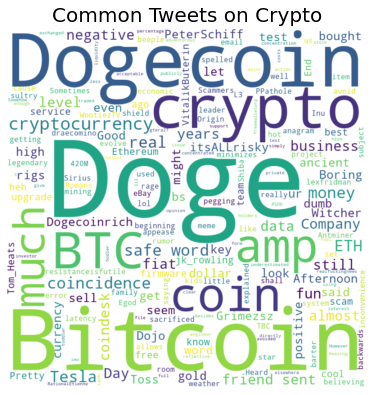

In [301]:
wordcloud_generator(df_ElonMuskCrypto['tweet'], title="Common Tweets on Crypto")

### Doge

In [302]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf = TfidfVectorizer(stop_words='english')
feature = tfidf.fit_transform(df_ElonMuskCrypto['tweet'])

In [303]:
query = "Doge"
query_feature = tfidf.transform([query])

cosims = cosine_similarity(query_feature, feature).flatten()
results = reversed(cosims.argsort()[-6:-1])

for r in results:
  print('-----')
  print(f"similarity score: {cosims[r]:.4f}, \ntweet: {df_ElonMuskCrypto.iloc[r]['tweet']}")

-----
similarity score: 0.5797, 
tweet: One word: Doge
-----
similarity score: 0.4962, 
tweet: 🎶 Who let the Doge out 🎶
-----
similarity score: 0.4962, 
tweet: Dojo 4 Doge
-----
similarity score: 0.4630, 
tweet: @lexfridman Sometimes it’s about Doge
-----
similarity score: 0.3747, 
tweet: Doge day afternoon


### Bitcoin

In [304]:
query = "Bitcoin"
query_feature = tfidf.transform([query])

cosims = cosine_similarity(query_feature, feature).flatten()
results = reversed(cosims.argsort()[-6:-1])

for r in results:
  print('-----')
  print(f"similarity score: {cosims[r]:.4f}, \ntweet: {df_ElonMuskCrypto.iloc[r]['tweet']}")

-----
similarity score: 0.7783, 
tweet: @Bitcoin How much for some anime Bitcoin?  
-----
similarity score: 0.4943, 
tweet: Bitcoin is my safe word
-----
similarity score: 0.4943, 
tweet: Bitcoin is *not* my safe word
-----
similarity score: 0.3770, 
tweet: Bitcoin is almost as bs as fiat money
-----
similarity score: 0.3143, 
tweet: @Maisie_Williams 🎶 Toss a bitcoin to ur Witcher 🎶
